## 단어 빈도 그래프 - 많이 쓰인 단어는?

### 1. 전처리

In [1]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
# 파일 제목을 읽어옴

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /data/ydkim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#num of characters used:', len(doc_alice))
print('#Text sample:')
print(doc_alice[:500])

#num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


내용을 확인하고 nltk를 이용해 토큰화한다. 토큰 수와 앞 20개의 토큰을 확인하고 위에서 본 앞부분 내용과 비교해본다.

In [3]:
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice)

print('#num of tokens used:', len(tokens_alice))
print('#token sample:')
print(tokens_alice[:20])

#num of tokens used: 33494
#token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


포터 스테머로 스테밍하고, 토큰 수와 앞 20개의 토큰을 확인한다.

In [4]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# 모든 토큰에 대해 스테밍 실행
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#num of tokens after stemming:', len(stem_tokens_alice))
print('#token sample:')
print(stem_tokens_alice[:20])

#num of tokens after stemming: 33494
#token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


WordLetLemmatizer를 이용해 표제어를 추출하고, 토큰 수와 앞 20개의 토큰을 스테밍 결과와 비교해본다.

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 모든 토큰에 대해 스테밍 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#num of tokens after lemmatization:', len(lem_tokens_alice))
print('#token sample:')
print(lem_tokens_alice[:20])

#num of tokens after lemmatization: 33494
#token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


위 두가지 결과를 종합적으로 볼 때, 어간 추출이든, 표제어 추출이든 토큰 수는 변하지 않는다. 토큰화한 결과에 대해 개별적으로 어간추출과 표제어 추출을 수행하기 때문이다.

이번에는 정규표현식을 이용해 토큰화를 하고 결과를 비교해보자.

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#token sample:')
print(reg_tokens_alice[:20])

#num of tokens with RegexpTokenizer: 21616
#token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


wordtokenizer를 사용했을 때보다 토큰 수가 현저히 줄어든 것을 확인할 수 있다. 부호와 2자 이하의 글자들이 모두 제외됐기 때문이다.  
여기서는 RegexpTokenizer릐 결과를 사용하기로 하고 결과에서 불용어를 제거한다.  
그리고 분석의 목적이 시각화이므로 단어를 알아보기 쉽도록 스테밍은 하지 않도록 한다.

In [9]:
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들 
english_stops = set(stopwords.words('english'))

# stopwords를 제외한 단어들만으로 리스트를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#num of tokens after stopwords elimination:', len(result_alice))
print('#token sample:')
print(result_alice[:20])

#num of tokens after stopwords elimination: 12999
#token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


### 2. 빈도수 체크

이제 텍스트 전처리가 완료됐으므로 각 단어별로 빈도를 계산한다. 여기서는 딕셔너리로 단어별 개수를 세고, 빈도가 큰 순으로 정렬한다.

In [13]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#Num of used words: 2687
#Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

빈도가 높은 상위 20개 단어를 보면 'would', 'could', 'and'와 같은 단어는 딱히 필요하지 않은 단어처럼 보인다.  
따라서 품사 태깅을 이용해 의미가 있을 것으로 생각되는 명사, 동사, 형용사만 추출해본다. 

In [14]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print('#num of used words: ', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

#num of used words:  1726
#Top 20 high frequency words:
'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

### 3. 시각화

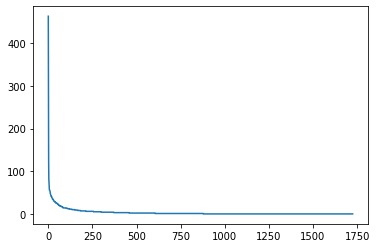

In [15]:
import matplotlib.pyplot as plt

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

그래프의 모양은 빈도수에 따라 정렬된 단어의 순위와 빈도수가 극단적으로 반비례하는 것을 보여준다.  
즉, 상위 몇 개의 단어는 빈도수가 매우 높지만 순위가 100위만 넘어가도 매우 적은 빈도수가 된다. 이것은 무엇을 의미할까?  
우리는 글을 쓸 때 자주 사용하는 단어만 주로 쓰는 경향이 있다.

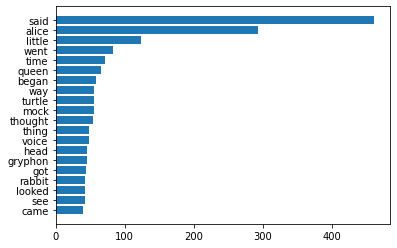

In [18]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)
plt.show()

### 4. 위드 클라우드로 내용을 한눈에 보기

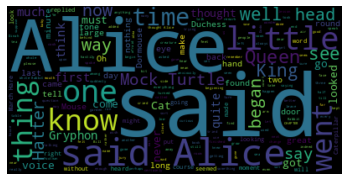

In [20]:
from wordcloud import WordCloud

# 워드 클라우드 이미지 생성
wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

WordCloud 객체의 generate() 메서드에 입력으로 문서를 넘겨주면 알아서 토큰화 등의 작업을 한다.  
그런데 우리는 이전 절에서 토큰화도 하고 불용어 제거도 하고 품사 태깅을 한 후 특정 품사만 결과에 포함하는 등 다양한 노력을 했다.  
그것을 가져다 쓸 수는 없을까? generate_from_frequencies() 메서드를 이용하면 계산된 빈도를 이용해서 워드 클라우드를 그릴 수 있다.

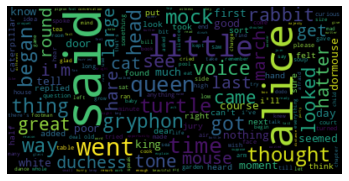

In [22]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 한국어 문서에 대한 그래프와 워드 클라우드

In [23]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) # 가져온 데이터의 타입 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [24]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) # 형태소 단위로 토큰화

print('#토큰위 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰위 수: 8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


위 토큰들을 보면 '\n\n'을 비롯한 기호들과 3, 1같은 숫사 그리고 '와', '에' 등은 딱히 그 수를 세는 것이 의미가 없어보인다.  
보통 워드 클라우드를 그릴 때에는 명사만 사용하는 것이 일반적이다.

In [25]:
tokens_const = t.nouns(const_doc) # 형태소 단위로 토큰화 후 명사만 추출
print('#토큰위 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰위 수:  3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


앞선 결과보다는 훨씬 좋아 보인다. 그러나 명사라고는 해도 '애', '것', '함', '제', '장'과 같은 1자로 된 명사는 의미를 부여하기 어려워보인다.  
마지막으로 아래와 같이 결과에서 1자로 된 명사는 삭제하고 결과를 살펴본다.

In [26]:
tokens_const = [token for token in tokens_const if len(token) > 1]
print('#토큰위 수: ', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰위 수:  3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']
